## Simulation to compare to Thorlabs 50x (Nico measurements)

In [1]:
import sys
if '..//' not in sys.path:
    sys.path.append('..//')

from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
from opmsim import anisotropy
import numpy as np
from matplotlib import pyplot as plt
import os

%matplotlib inline 
#notebook

np.set_printoptions(threshold=sys.maxsize)

opm_angle = 0*np.pi/180

ndipoles = 5000

options = {
    'ray_count': 15000,
    'draw_rays': False,
    'max_rays_stored': 10000,
    'ray_dist': "fibonacci"
}

plot_options = {
    'title': 'Pupil intensity at final image plane of OPM microscope',
    'add_sim_details': True,
    'max_r_in': 0,
    'scale_range': [0.0,3,4]# [0,0.3]
}

ris_snouty = [1.7]
ar_ri_snouty = 1.38
ar_thickness_snouty = 500e-9/4
    
O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.180/50, n=1)
O3 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=opm_angle)
O3_snouty = optical_elements.SineLens(NA=1, focal_length=0.09, n=1, yAxis_rotation=opm_angle,
                                     interface_ris=ris_snouty, ar_coating_ri=ar_ri_snouty,
                                    ar_coating_thickness=ar_thickness_snouty)

O3_snouty_perf = optical_elements.SineLens(NA=1, focal_length=0.09, n=1, yAxis_rotation=opm_angle)

#O3 = optical_elements.SineLens(NA=0.75, focal_length=0.200/50, n=1, yAxis_rotation=opm_angle)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)

O3_olymp = optical_elements.SineLens(NA=0.6, focal_length=0.180/50, n=1)
O3_35 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=35*np.pi/180)

 
diag = optical_elements.DiagonalMatrix(-1)

HWP = optical_elements.WavePlate(np.pi/4, np.pi)
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)
QWP2 = optical_elements.WavePlate(-np.pi/4, np.pi/2)

LP = optical_elements.LinearPolariser(0)
LP2 = optical_elements.LinearPolariser(np.pi/2)

AgSiO2_mirror = optical_elements.FlatMirror(opm_angle/2, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")


mirror = optical_elements.FlatMirror(0, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")

savepath = "C:/Users/lnr19/OneDrive - Imperial College London/thesis/for _thesis/modelling/pupils/"
savepath_full = os.path.join(savepath, "OPM_snout_fib2")
if not os.path.exists(savepath_full):
    os.makedirs(savepath_full)

opm_ce_filename = os.path.join(savepath_full,'opm_collection_efficiency.txt')

Full sphere generation
cap method area sum 12.563856837581476
expected area sum 6.283185307179586


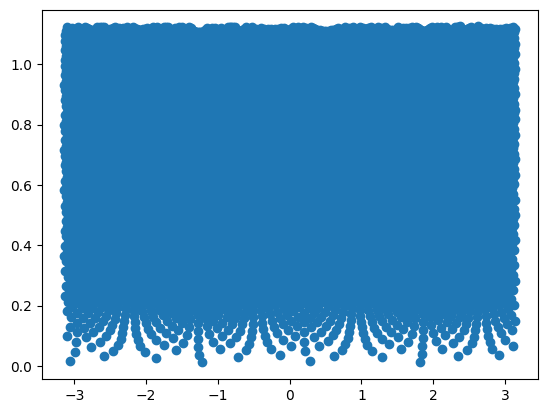

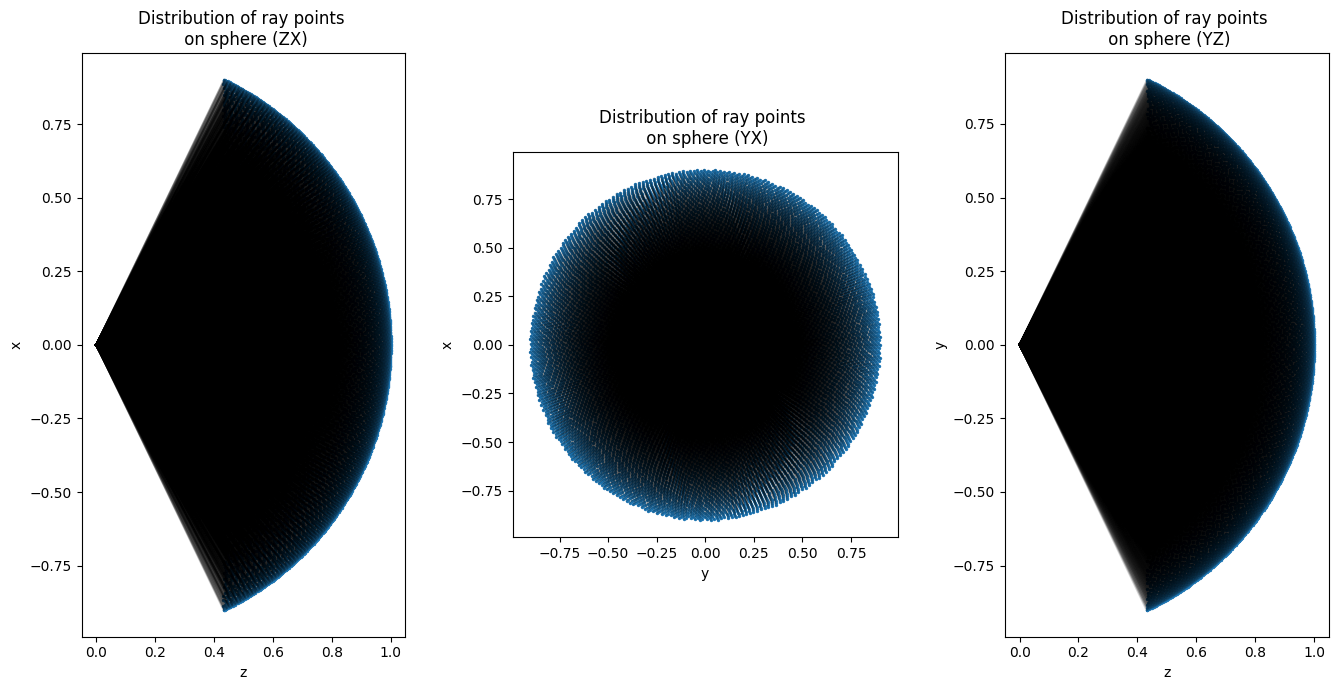

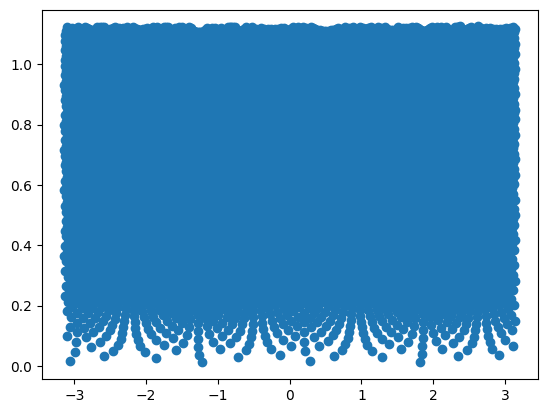

n_dipoles 4999
n_rays 8530
pvec shape (4999, 1, 3)
nvec shape (1, 8530, 3)
(4999, 8530, 3, 1)
(4999, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185293923816
expected area sum 6.283185307179586
n_dipoles 4999
n_rays 15308
pvec shape (4999, 1, 3)
nvec shape (1, 15308, 3)
(4999, 15308, 3, 1)
(4999, 1, 1, 1)
initial energy shape ()
n rays 2pi =  15308
(8530, 3, 1)
n rays =  8530
NA area vs real area? 0.9999999999999997 3.5738661731158983
half_sphere_energy 4.188790837733714
initial_energy 0.6666865791365786
rays when NA scaled up to hemisphere 53595.57067024188
initialisation time in system 38.250684s
Flat pupil
CURVED REFRACTION
FLAT REFRACTION
CURVED REFRACTION
FLAT REFRACTION
(8530, 3)
()
()
(8530, 3)
(8530, 3)
()
()
(8530, 3)
fresnel_matrix.shape (8530, 3, 3)
(1, 8530, 3, 3)
CURVED REFRACTION
Saved checkpoint with 10000 rays


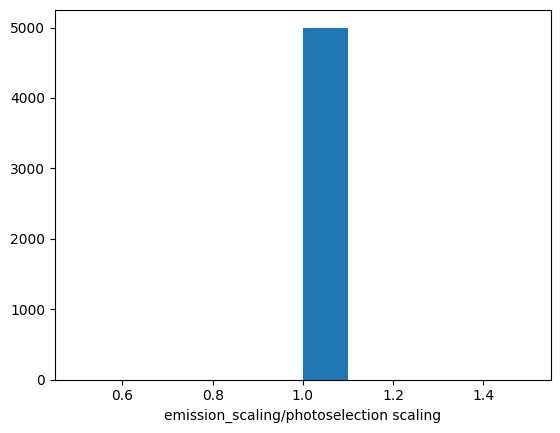

Limiting radius for detector: 0.004788
Energy ratio (efficiency): 1.1938017652666049
Total energy per dipole per ray: 0.7958916150528016
Energy from Ix 5046.555480960054
Energy from Iy 1742.376701802364
X/Y energy ratio = 2.8963630400588767
Half sphere energy 4.188790837733714
Initial energy 0.6666865791365786
half sphere energy NA 0.6666667688098428


AttributeError: 'PolarRays' object has no attribute 'I_total'

In [2]:
## unpolarised

source = dipole_source.DipoleSource()
source.generate_dipoles(ndipoles)
# source.classical_photoselection((np.pi/2,0))
plot_options['scale_range'] =  [0,8,5]

opm_angles = np.linspace(0,35,7)
# opm_angles = [0]

elements = [O1, TL1, TL2, O2, O3_snouty]
# elements = [O2, TL1, TL1, O2, O3_olymp]


with open(opm_ce_filename, 'a') as f:
    f.write("OPM angle, RCE, % rays kept, CE\n")
    for angle in opm_angles:
        
        O3 = optical_elements.SineLens(NA=0.6, focal_length=0.180/40, n=1, yAxis_rotation=angle*np.pi/180)
        #O3_olymp = optical_elements.SineLens(NA=0.6, focal_length=0.180/50, n=1,yAxis_rotation=angle*np.pi/180)
        O3_snouty = optical_elements.SineLens(NA=1, focal_length=0.09, n=1, yAxis_rotation=angle*np.pi/180,
                                     interface_ris=ris_snouty, ar_coating_ri=ar_ri_snouty,
                                    ar_coating_thickness=ar_thickness_snouty)

        #O3 = optical_elements.SineLens(NA=0.75, focal_length=0.200/50, n=1, yAxis_rotation=angle*np.pi/180)
        elements[4] = O3_snouty

        plot_options['title'] = \
            r'Intensity in exit pupil for OPM: $\theta_{OPM}=%d^{\circ}$, unpolarised excitation, static fluorophores'\
            % angle
        # plot_options['title'] = r'Intensity in exit pupil for OPM'

        system = OpticalSystem("OPM system (%d degrees) in-plane excitation steady state" % angle, elements, source, options)
        system.trace()

        pupil_fig = system.detector.plot_pupil(**plot_options)
        plot_options['title'] = \
            r'Intensity incident on O1 for OPM: $\theta_{OPM}=%d^{\circ}$, unpolarised excitation, static fluorophores'\
            % angle
        pupil_fig_i = system.initial_detector.plot_pupil(**plot_options)

        f.write("%02d, %0.5f, %0.5f, %0.5f\n" % (angle, system.detector.relative_collection_efficiency,
                          100*system.detector.n_rays/system.detector.n_rays_initial, system.detector.collection_efficiency))

        pupil_fig_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_unpol_%02d.png" % angle), bbox_inches='tight')
        pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_unpol_%02d.png" % angle), bbox_inches='tight')


Full sphere generation
cap method area sum 12.563856837581476
expected area sum 6.283185307179586
plot exc arrow


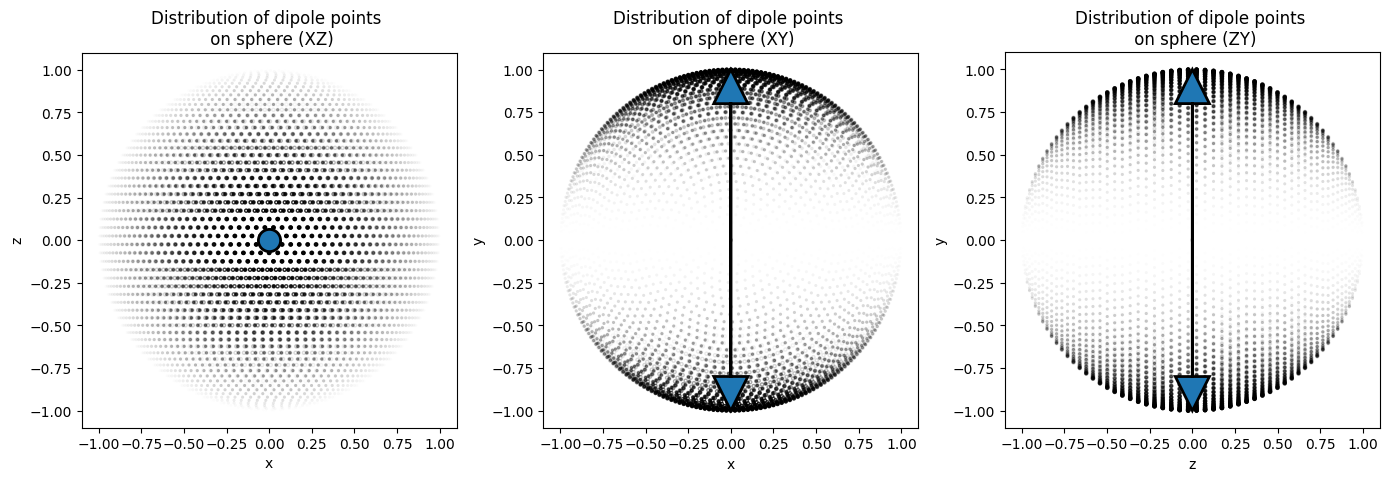

RANDOM MC RAY GENERATION
Sampling 10000 points from PDF (Monte Carlo Rejection method)


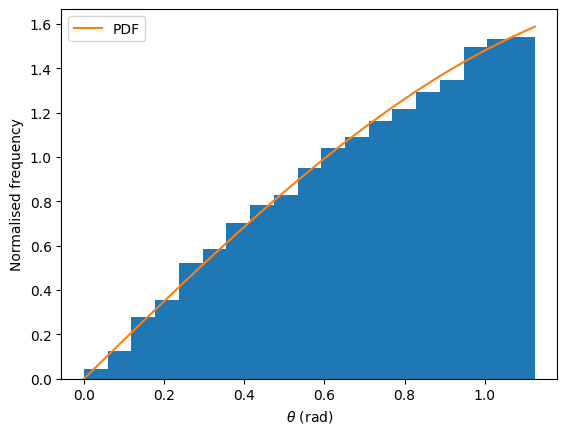

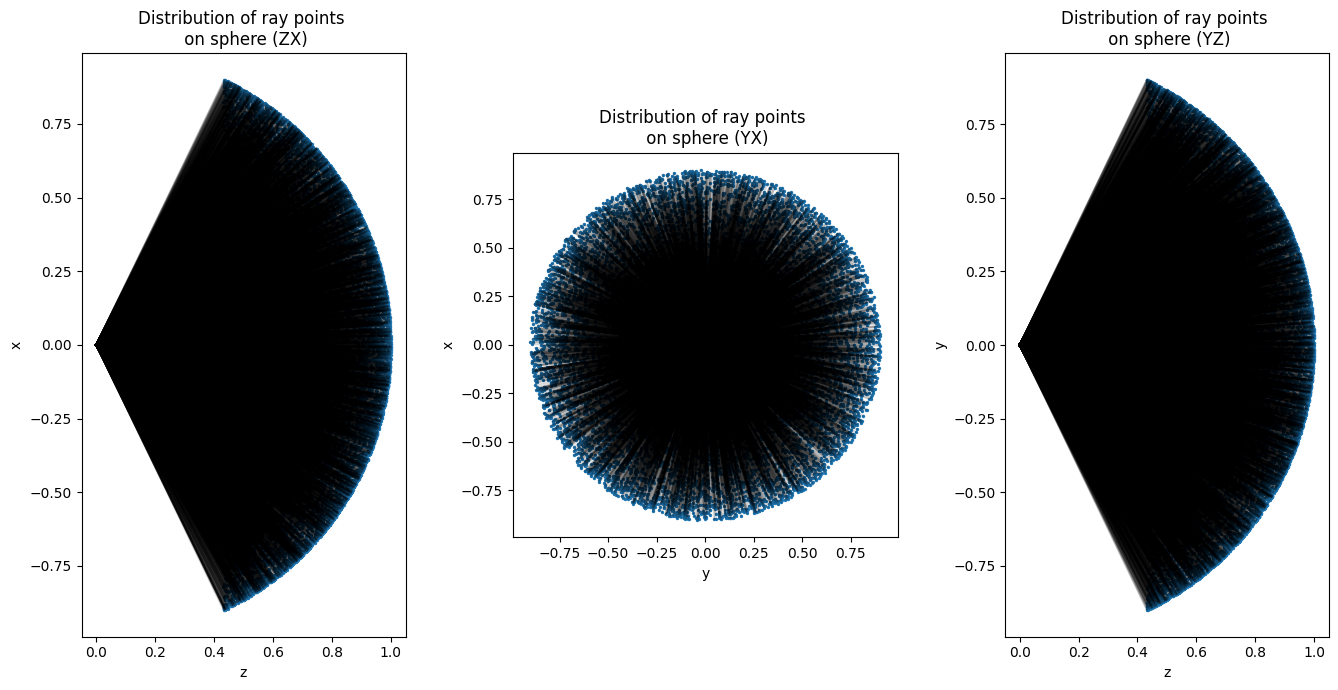

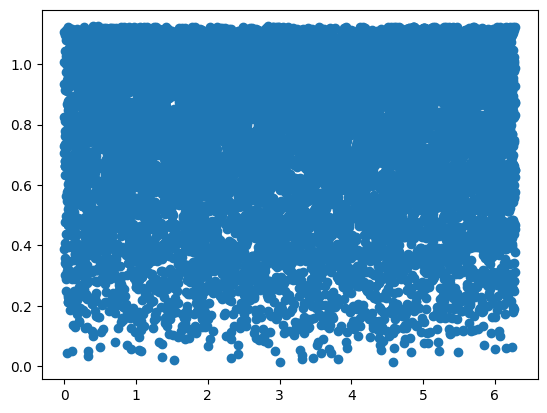

n_dipoles 4999
n_rays 10000
pvec shape (4999, 1, 3)
nvec shape (1, 10000, 3)
(4999, 10000, 3, 1)
(4999, 1, 1, 1)
initial energy shape ()
cap method area sum 6.283185277694102
expected area sum 6.283185307179586
n_dipoles 4999
n_rays 10251
pvec shape (4999, 1, 3)
nvec shape (1, 10251, 3)
(4999, 10251, 3, 1)
(4999, 1, 1, 1)
initial energy shape ()
n rays 2pi =  10251
(10000, 3, 1)
n rays =  10000
NA area vs real area? 1.0000000000000004 3.5738661731158983
half_sphere_energy 1.3978032301447492
initial_energy 0.23627566152926893
rays when NA scaled up to hemisphere 62831.853071795835
initialisation time in system 42.188821s
Flat pupil
CURVED REFRACTION
FLAT REFRACTION
CURVED REFRACTION
FLAT REFRACTION
rotating rays by 0.08726646259971647
CURVED REFRACTION
6408 escaped from NA mask
Saved checkpoint with 10000 rays


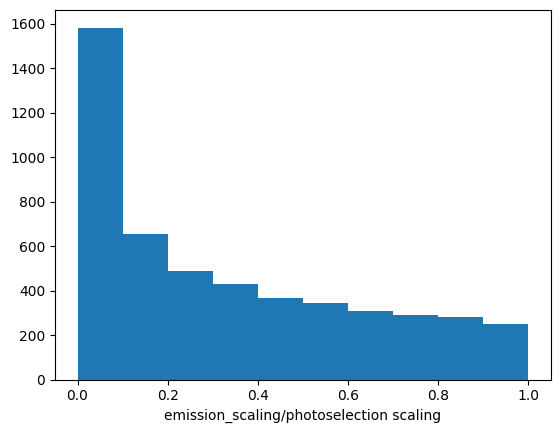

Limiting radius for detector: 0.004788
Energy ratio (efficiency): 0.38679957808185234
Total energy per dipole per ray: 0.09139132619053177
Energy from Ix 240.4279498152612
Energy from Iy 673.4853120900561
X/Y energy ratio = 0.3569906358746425
Half sphere energy 1.3978032301447492
Initial energy 0.23627566152926893
half sphere energy NA 0.2224672945913409
maxr 0.004788
6408 escaped out of 10000
Saved checkpoint with 10000 rays
6408 escaped out of 10000
time in trace_rays 44.962256s
ray count 3592
max Ix 0.8513902145922069
scale range in _plot_unstructured [0.0, 3, 4]
min for scale 0.0
max for scale 3
Filling background of polar plot with zeroes!
max_r_in 0 max_r 0.0029998858740646244
max_r_reduced 0.0029997995916298857 max_r 0.0029998858740646244


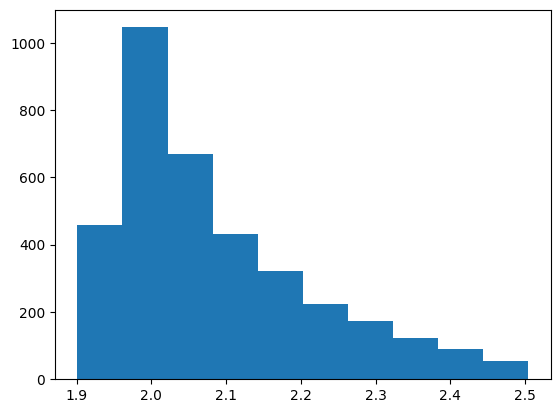

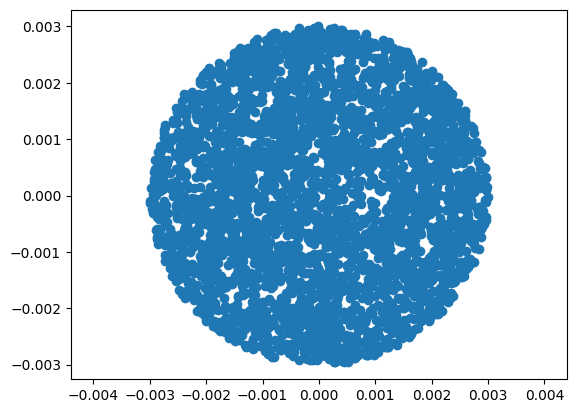

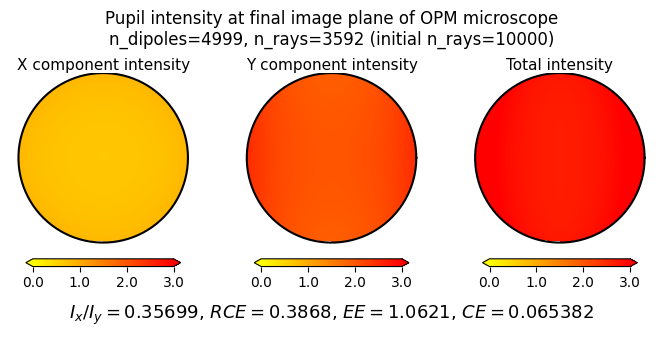

In [3]:
options = {
    'ray_count': 10000,
    'draw_rays': False,
    'max_rays_stored': 10000,
    'ray_dist': "random"
}
source = dipole_source.DipoleSource()
source.generate_dipoles(ndipoles)
source.classical_photoselection((np.pi/2,0))

O2_test = optical_elements.SineLens(NA=0.95, focal_length=1/50, n=1)
O3_5 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=5*np.pi/180)
O3_a = lambda angle: optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=angle*np.pi/180)

elements = [O1, TL1, TL2, O2, O3_5]

system = OpticalSystem("OPM system (%d degrees) in-plane excitation steady state" % 35, elements, source, options)
system.trace()

pupil_fig = system.detector.plot_pupil(**plot_options)

In [ ]:
plot_options = {
    'title': 'Pupil intensity at final image plane of OPM microscope',
    'add_sim_details': True,
    'max_r_in': 0,
    'scale_range': None
}

In [ ]:
O3_olymp